# k-최근접 이웃 분류의 클래스 확률 계산

k-최근접 이웃 분류기를 활용하여 이웃의 클래스 비율을 확률로 계산할 수 있다

---

생선의 무게, 길이, 너비 등으로 종류를 분류하는 k-최근접 이웃 분류의 클래스 확률을 구해보자

In [1]:
## 데이터 준비

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

print(fish.head())
print(pd.unique(fish['Species']))

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

train_input[:5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

In [3]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [ ]:
## k-최근접 이웃 분류기

# classes_ 속성: 타깃값을 정렬하여 저장한다

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
## 클래스 확률 계산 -> 확률값이 제한적인 문제점이 있다

# predict_proba(입력 데이터) 메서드: 이웃의 클래스별 비율을 반환한다
# round() 함수: 반올림하여 반환한다
# decimals 매개변수: 소수점 아래 자릿수를 지정한다 (기본값은 0)

print(kn.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 로지스틱 회귀

선형 방정식을 사용한 분류 알고리즘이다. 타깃 클래스가 2개면 이진 분류, 타깃 클래스가 2개 이상이면 다중 분류로 구분한다.

*   이진 분류: 선형 방정식을 통해 나온 z값을 시그모이드 함수(로지스틱 함수)를 적용하여 0~1 사이의 확률 값으로 변환한다.

*   다중 분류: 클래스별로 다른 선형 방정식을 학습해 z값을 구한다. z값들을 소프트맥스 함수를 적용하여 총합이 1이 되도록 정규화한다.


---


*   도미와 빙어 2개를 사용한 이진 분류를 구해보자
*   생선 7개를 사용한 다중 분류를 구해보자




In [4]:
### 도미와 빙어 2개를 사용한 이진 분류

## 데이터 준비

bream_smelt_indexes = (train_target=='Bream') | (train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [5]:
## 로지스틱 회귀 모델 훈련
## LogisticRegression 클래스: 로지스틱 회귀 모델을 훈련시킨다

# coef_ 속성: 기울기를 저장한다
# intercept_ 속성: 절편을 저장한다

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.classes_)    #도미=0(음성 클래스), 방어=1(양성 클래스)
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
## 클래스 확률 계산

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# decision_function() 메서드: z값을 반환한다 (z값은 표준점수가 아니라 선형방정식에서 나온 값을 의미한다)
# expit() 함수: 시그모이드 함수를 적용한 값을 반환한다

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

from scipy.special import expit

print(expit(decisions))   #선형 방정식에 활성화 함수를 적용하면 양성 클래스에 대한 확률이 나온다

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [7]:
### 생선 7개를 사용한 다중 분류

## LogisticRegression 클래스: 로지스틱 회귀 모델을 훈련시킨다
# max_iter 매개변수: 반복 횟수를 지정한다 (기본값은 100)
# penalty 매개변수: L1규제(라쏘 회귀)와 L2규제(릿지 회귀)를 선택한다 (기본값은 'l2')
# C 매개변수: 규제의 강도를 지정한다. C 매개변수↓ 규제↑ (기본값은 1.0)

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.classes_, '\n')
print(lr.coef_)
print(lr.intercept_)    #다중 분류는 클래스별로 다른 선형 그래프를 학습한다

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 

[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]]
[-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


In [8]:
## 클래스 확률 계산

print(lr.predict(test_scaled[:5]), '\n')

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch'] 

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
## softmax() 함수: 소프트맥스 함수를 적용한 값을 반환한다
# axis 매개변수: 계산할 축을 지정한다

from scipy.special import softmax

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2), '\n')

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]] 

[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.04 0.   0.01 0.95 0.  ]
 [0.   0.   0.03 0.93 0.02 0.02 0.  ]
 [0.01 0.03 0.31 0.01 0.57 0.   0.08]
 [0.   0.   0.9  0.   0.09 0.   0.  ]]


# 확률적 경사 하강법

훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 조금씩 하강하며 최적의 모델을 찾는 점진적 학습 알고리즘

*   점진적 학습: 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서 조금씩 더 훈련한다
*   손실 함수: 머신러닝 알고리즘의 손실을 측정하는 함수 -> 작을수록 좋다
*   에포크: 전체 샘플을 모두 사용하는 한번 반복을 의미한다





In [ ]:
## 데이터 준비

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [ ]:
## SGDClassifier 클래스: 사이킷런에서 확률적 경사 하강법을 제공하는 분류용 클래스
# loss 매개변수: 손실 함수의 종류를 지정한다
# max_iter 매개변수: 수행할 에포크 횟수를 지정한다
# tol 매개변수: 일정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 조기 종료한다

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
## partial_fit() 메서드: 기존의 모델에서 1에포크를 추가로 훈련한다
# classes 매개변수: fit() 메서드를 기존에 사용하지 않은 경우 훈련 세트의 전체 클래스의 레이블을 전달한다

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


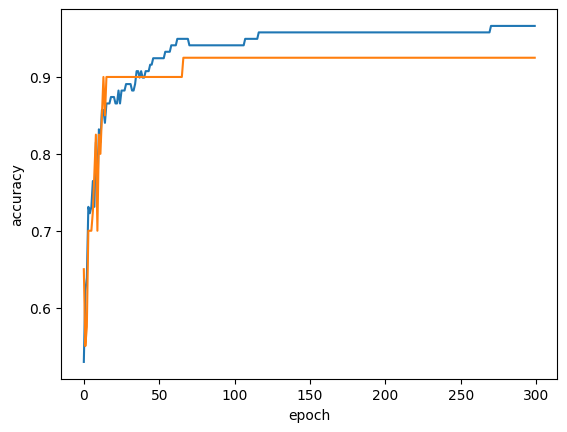

In [ ]:
## 최적의 에포크 횟수 구하기
# 에포크 횟수↑: 훈련 세트를 완전히 학습한다 -> 과대적합
# 에포크 횟수↓: 훈련 세트를 덜 학습한다 -> 과소적합

import matplotlib.pyplot as plt

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
c = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=c)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
## 최적의 에포크 횟수의 모델 (max_iter=100)

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
